# Comparison of Euler and 4th order Runge-Kutta method

We will evaluate a numerical solution to a differential equation:

$\frac{df(x)}{dx} = e^x$

subject to:

$f(0) = e$

which has a known analytical solution for error comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting parameters:
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}
ifont = {'fontname':'Charter', 'fontweight':'regular', 'style':'italic'}

font_axes = 12
font_labels = 18
font_title = 22
font_text = 14
font_legend = 16

## Define function that evaluates $e^x$ for any $x$

In [2]:
def e_to_x(x):
    return(np.exp(x))

## Define function performing Euler stepping

In [3]:
def euler(f, x_0, f_0, h, N):
    """This function performs N Euler steps"""
    
    f_euler = np.zeros(N+1)
    f_euler[0] = f_0

    for i in range(0,N):
        f_euler[i+1] = f_euler[i] + h * f(x_0+i*h)

    return f_euler

## Define function performing Runge-Kutta stepping

In [4]:
def runge_kutta(f, x_0, f_0, h, N):
    """This function performs N Runge-Kutta steps"""
    
    R = np.zeros(N+1)
    f_RK = np.zeros(N+1)
    f_RK[0] = f_0

    R1 = f(x_0) * h
    R2 = f(x_0 + 0.5*h) * h
    R3 = f(x_0 + 0.5*h) * h
    R4 = f(x_0 + h) * h

    R[0] = 1/6 * (R1 + 2*R2 + 2*R3 + R4)
    
    for i in range(0, N):
        f_RK[i+1] = f_RK[i] + R[i]

        R1 = f(x_0+(i+1)*h) * h
        R2 = f(x_0+(i+1)*h + 0.5*h) * h
        R3 = f(x_0+(i+1)*h + 0.5*h) * h
        R4 = f(x_0+(i+1)*h + h) * h

        R[i+1] = 1/6 * (R1 + 2*R2 + 2*R3 + R4)
    
    return f_RK

## Run both numerical differentiations and compute analytical solution

In [5]:
N = 5
x_0 = 1
x_end = 4
h = (x_end - x_0)/N
f_0 = e_to_x(x_0)
x = np.linspace(x_0, x_end, N+1)

f_euler = euler(e_to_x, x_0, f_0, h, N)
f_RK = runge_kutta(e_to_x, x_0, f_0, h, N)

N = 30
x_soln = np.linspace(x_0, x_end, N+1)
f_soln = np.exp(x_soln)

## Plot the comparison

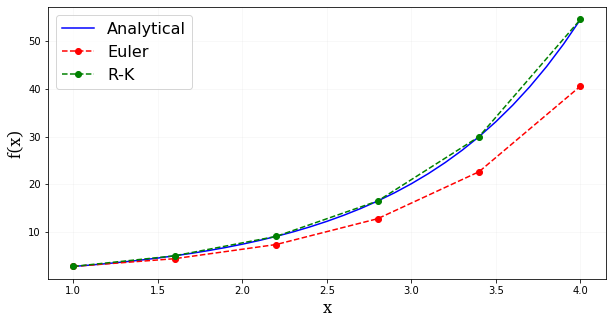

In [6]:
# Plot:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(x_soln, f_soln, 'b-')
plt.plot(x, f_euler, 'ro--')
plt.plot(x, f_RK, 'go--')

plt.grid(True, alpha=0.1)
plt.xlabel(r'x', fontsize=font_labels, **csfont)
plt.ylabel(r'f(x)', fontsize=font_labels, **csfont)
lgnd = plt.legend(['Analytical', 'Euler', 'R-K'], fontsize=font_legend, loc="upper left")
    
# Save plot:
filename = 'euler-runge-kutta-4th-order-comparison.png'
plt.savefig(filename, dpi = 150)